| **Chapter** | 7: Temporal dynamics of epidemics |
| ------------- |-----------------------------------|
| **Computational Note** | None                              |
| **Package prerequisites** | None                              |

# Sinusoidal temporal forcing

\begin{equation}
    \beta(t) = \beta_0 (1 + \beta_1 \cos (\omega t)) \\
\end{equation}

\begin{equation}
    \frac{dS}{dt} = \mu - \beta(t) S I - \mu S
\end{equation}

\begin{equation}
    \frac{dI}{dt} = \beta(t) S I - \gamma I - \mu I
\end{equation}

\begin{equation}
    \frac{dR}{dt} = \gamma I - \mu R
\end{equation}

In [95]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [96]:
def deriv(t, y, beta_0, beta_1, omega, gamma, mu):
    S, I, R = y

    beta_t = beta_0 * (1 + beta_1 * np.cos(omega * t))

    dSdt = mu - beta_t * S * I - mu * S
    dIdt = beta_t * S * I - gamma * I - mu * I
    dRdt = gamma * I - mu * R

    return dSdt, dIdt, dRdt

In [97]:
def calculate_oscillations(R0, beta_0, beta_1, omega_y=1, I_0=1e-4, mu_y=0.1):
    S_0 = 1 - I_0
    R_0 = 0
    y_0 = (S_0, I_0, R_0)

    mu = mu_y / 365
    omega = omega_y * ((2 * np.pi)/365)
    gamma = beta_0 / R0

    res = solve_ivp(fun=deriv, 
                    t_span = (0, 365*50),
                    y0=y_0, 
                    args=(beta_0, beta_1, omega, gamma, mu),
                    max_step=1)
    
    return res

In [98]:
res = calculate_oscillations(R0 = 3, beta_0 = 0.02, beta_1 = 0.6)

/var/folders/1d/97x3559931s0_6hkz64q4zth0000gn/T/ipykernel_35508/24381316.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


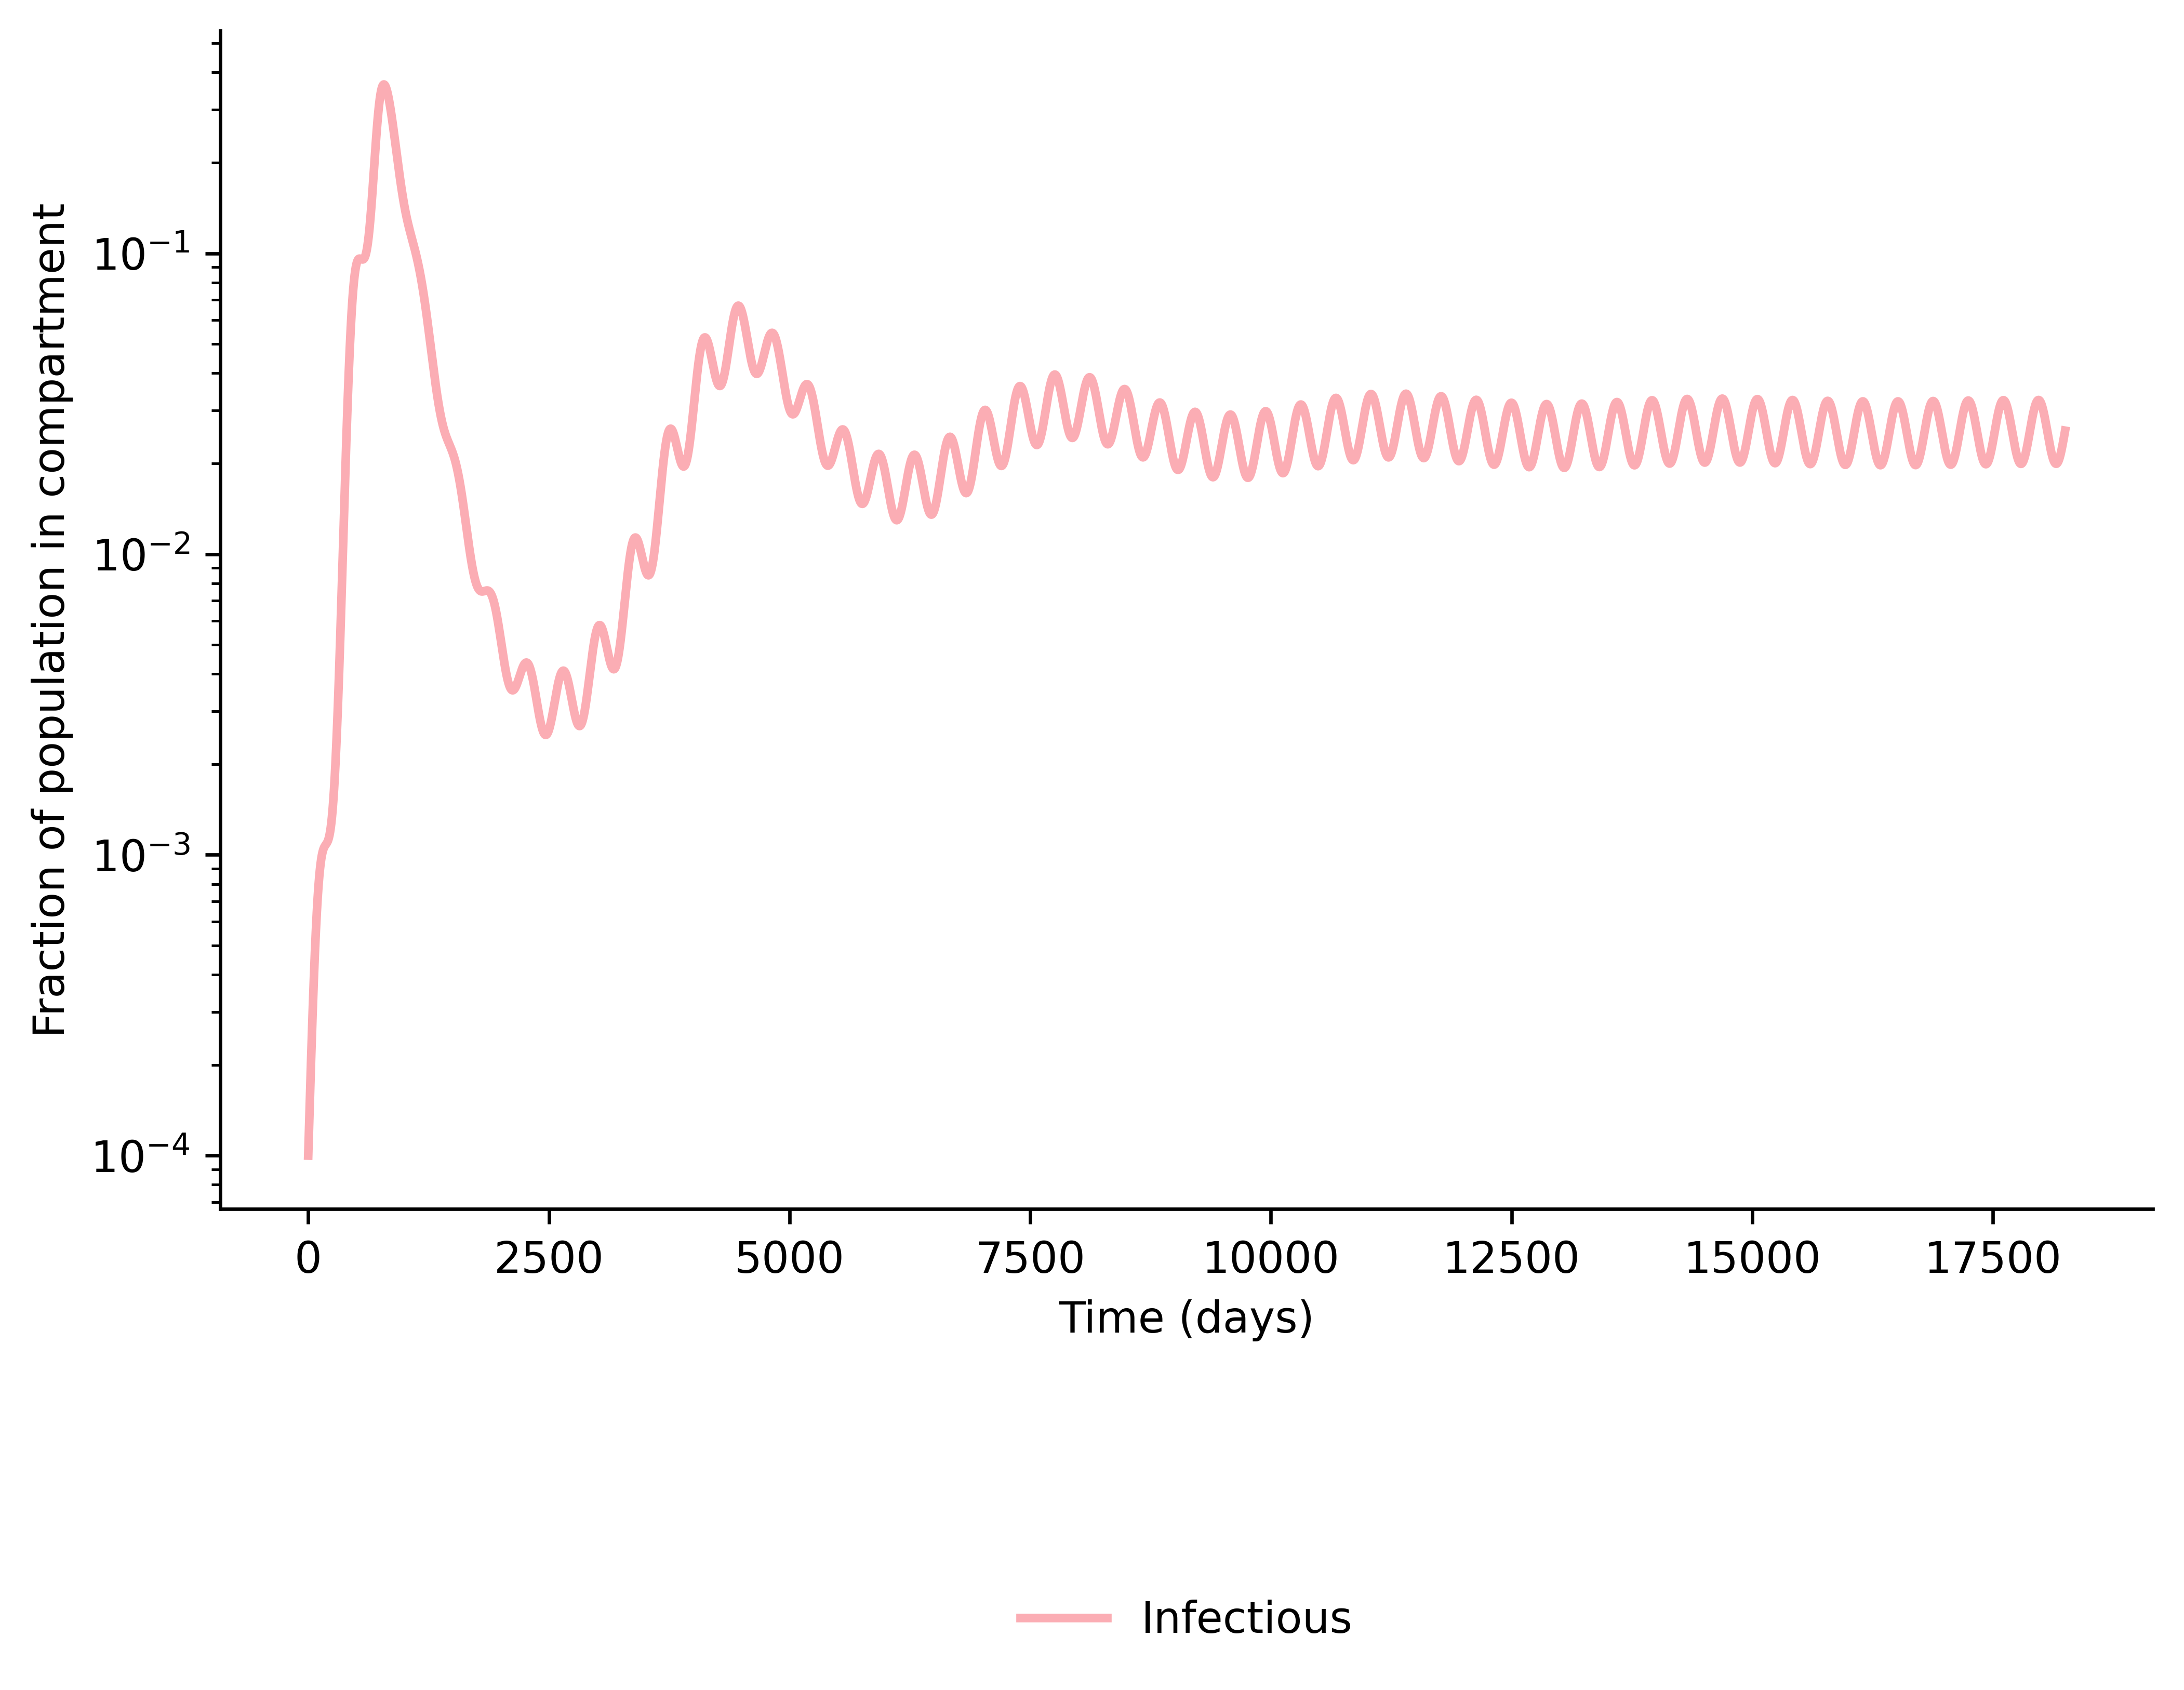

In [99]:
S, I, R = res.y

fig = plt.figure(facecolor="w", figsize=(8, 6), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(res.t, I, color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")

ax.set_yscale('log')
ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of population in compartment")
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.4), loc="lower center", ncol=2, frameon=False)


fig.subplots_adjust(bottom=0.25)

plt.savefig("seir_temp_forcing.pdf")
plt.show()